In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

# make_blobs method generate isotropic gaussian blobs for clustering

# Main cluster
X, y_true = make_blobs(n_samples=400, centers=1, cluster_std=0.60, random_state=0)

# Anomaly Cluster
X_append, y_true_append = make_blobs(n_samples=10,centers=1, cluster_std=5,random_state=0)

print(X.shape, y_true.shape)
print(X_append.shape, y_true_append.shape)

(400, 2) (400,)
(10, 2) (10,)


In [2]:
X = np.vstack([X, X_append])
X
x_df = pd.DataFrame(X)
x_df.head()

,0,1
0,0.897638,4.983635
1,1.076274,4.684806
2,1.016180,4.485270
3,0.966058,4.531278
4,-0.084853,4.517076


In [3]:
# For plotting
X = X[:, ::-1]

In [4]:
y_true = np.hstack([y_true, [1 for _ in y_true_append]])
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

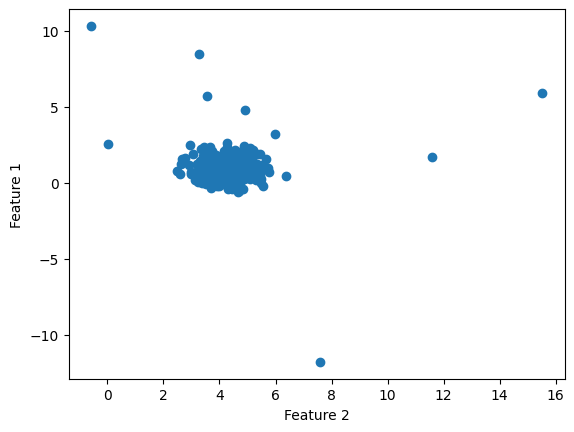

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')
plt.show()

In [6]:
def get_gaussian(X):
    n = X.shape[0]
    summ = np.sum(X, axis=0)
    
    mu = 1 /n * summ
    var = 1/n * np.sum((X - mu)**2, axis=0)
    
    return mu,var
  
mu, sigma2 = get_gaussian(X)
print(mu)
print(sigma2)

[4.30770882 0.9756171 ]
[0.94147734 1.25990509]


In [7]:
def multivariateGaussian(X, mu, sigma2):
    k = len(mu)
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))*np.exp(-0.5*np.sum(X@np.linalg.pinv(sigma2)*X,axis=1))
    return p

p = multivariateGaussian(X, mu, sigma2)

In [8]:
sigma2 = np.diag(sigma2)

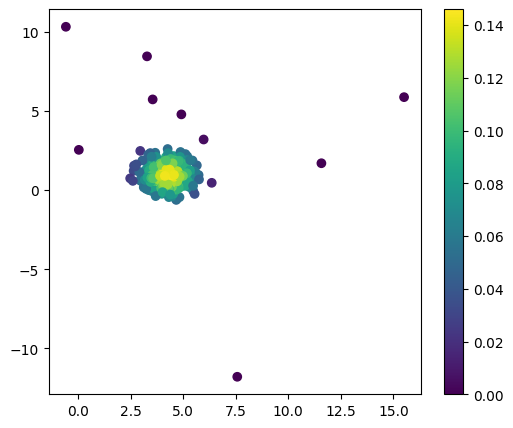

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],c=p,cmap='viridis');
plt.colorbar();

In [10]:
print(p.min(),p.max())

1.2623338074896085e-34 0.14606732453094934


(array([ 8.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  1.,
         0.,  0.,  1.,  2.,  0.,  2.,  0.,  2.,  3.,  0.,  3.,  1.,  1.,
         2.,  1.,  1.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  3.,
         0.,  0.,  3.,  2.,  1.,  2.,  0.,  0.,  1.,  1.,  3.,  1.,  0.,
         1.,  2.,  2.,  3.,  0.,  4.,  0.,  3.,  3.,  1.,  4.,  2.,  1.,
         6.,  1.,  4.,  3.,  1.,  3.,  3.,  3.,  1.,  0.,  1.,  7.,  2.,
         1.,  4.,  1.,  5.,  1.,  2.,  5.,  3.,  2.,  1.,  8.,  4.,  4.,
         1.,  1.,  2.,  3.,  3.,  2.,  4.,  4.,  1.,  0.,  4.,  1.,  8.,
         3.,  3.,  2.,  5.,  4.,  5.,  4.,  4.,  2.,  3.,  4.,  1.,  2.,
         3.,  7.,  6.,  2.,  6.,  5.,  8.,  4.,  2.

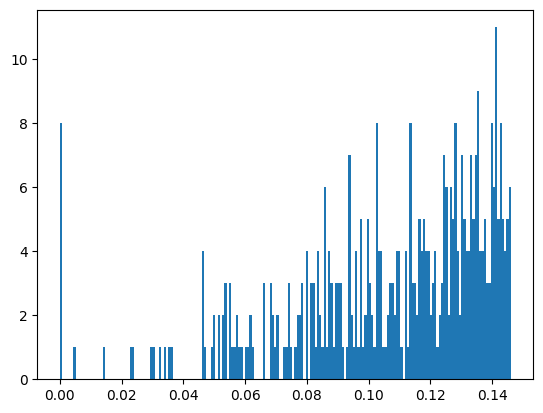

In [12]:
plt.hist(p, bins = 200)

In [13]:
threshold = 0.01

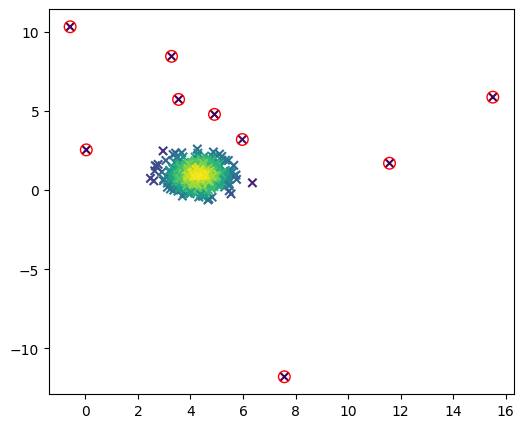

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis')

# Circling anomalies
outliers = np.nonzero(p<threshold)[0] 
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);